# The PBS algorithm for MAPF

In [10]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from queue import deque, PriorityQueue
from copy import deepcopy

import sys
sys.path.append('../')
from metrics import flowtime, makespan
                
from MAPF import MultiAgentAStar,find_conflict,CBS, PBS, PBS_OPEN
# from SAPF import SpaceTimeAStar

%load_ext autoreload
%autoreload 2

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


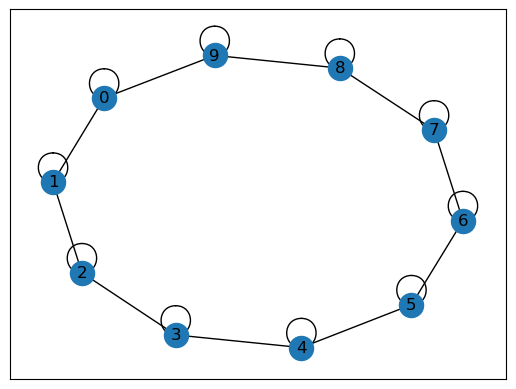

In [11]:
G = nx.circulant_graph(10,offsets = [0,1])
nx.draw_networkx(G)

In [13]:
# Basic components of the MAPF problem

G # The graph

start_nodes = tuple([0,1]) # Must be hashable.

goal_nodes = tuple([3,9]) 

'''
    If the problem is labeled, the goals are pre-assigned to the agents, meaning agent k must go to goal k. 
    Otherwise, the goals are not pre-assigned to the agents, meaning the problem is considered solved if all goals are occupied by the agents.
'''
labeled_goals = True 

print('Multi-agent A*', MultiAgentAStar(G,start_nodes,goal_nodes,labeled_goals,check_edge_conflicts=True))

print('CBS',CBS(G,start_nodes,goal_nodes,check_edge_conflicts=True))


print('PBS',PBS(G,start_nodes,goal_nodes))

print('PBS_OPEN',PBS_OPEN(G,start_nodes,goal_nodes))

Multi-agent A* (array([[0, 9, 8, 7, 6, 5, 4, 3],
       [1, 0, 9, 9, 9, 9, 9, 9]]), 9)
CBS ([[0, 9, 8, 7, 6, 5, 4, 3], [1, 0, 9]], 9)
PBS ([[0, 1, 2, 3], [1, 2, 3, 4, 5, 6, 7, 8, 9]], 11)
PBS_OPEN ([[0, 9, 8, 7, 6, 5, 4, 3], [1, 0, 9]], 9)


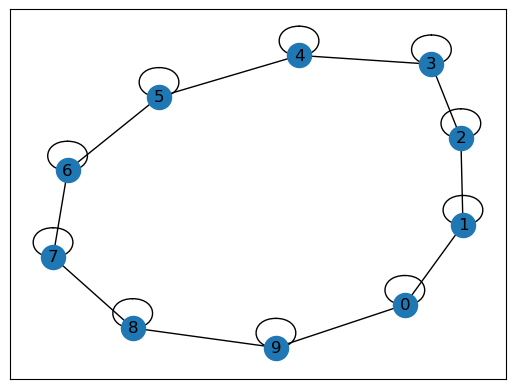

In [14]:

G = nx.circulant_graph(10,offsets = [0,1])
nx.draw_networkx(G)

In [15]:
# Basic components of the MAPF problem

G # The graph

start_nodes = tuple([0,1,2]) # Must be hashable.

goal_nodes = tuple([3,6,9]) 

'''
    If the problem is labeled, the goals are pre-assigned to the agents, meaning agent k must go to goal k. 
    Otherwise, the goals are not pre-assigned to the agents, meaning the problem is considered solved if all goals are occupied by the agents.
'''
labeled_goals = True 


print('Multi-agent A*', MultiAgentAStar(G,start_nodes,goal_nodes,labeled_goals,check_edge_conflicts=True))

print('CBS',CBS(G,start_nodes,goal_nodes,check_edge_conflicts=True))



print('PBS',PBS(G,start_nodes,goal_nodes))

print('PBS_OPEN',PBS_OPEN(G,start_nodes,goal_nodes))

Multi-agent A* (array([[0, 1, 2, 3, 3, 3, 3, 3],
       [1, 2, 3, 4, 5, 6, 6, 6],
       [2, 3, 4, 5, 6, 7, 8, 9]]), 15)
CBS ([[0, 9, 8, 7, 6, 5, 4, 3], [1, 0, 9, 8, 7, 6], [2, 1, 0, 9]], 15)
PBS ([[0, 9, 8, 7, 6, 5, 4, 3], [1, 0, 9, 8, 7, 6], [2, 1, 0, 9]], 15)
PBS_OPEN ([[0, 9, 8, 7, 6, 5, 4, 3], [1, 0, 9, 8, 7, 6], [2, 1, 0, 9]], 15)
